# 텐서플로우란  What is a Tensorflow?

## 1 Intro

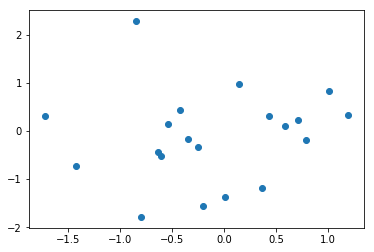

In [1]:
# simple test
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt

a = tf.random_normal([2, 20])
sess = tf.Session()
out = sess.run(a)
x, y = out
plt.scatter(x,y)

In [2]:
# Nural Network 를 설계 후 실행
import tensorflow as tf

# tf.constant() : 파이썬 생성자 (스칼라 값 integer 를 Tensor 객체로 변환)
a = tf.constant(5, name="input_a") # name : 식별자
b = tf.constant(3, name="input_b")

# tf.mul / tf.add : 계산 Node (Operation)
c = tf.multiply(a,b, name="mul_c") # a, b 두개 입력 곱을 연산
d = tf.add(a,b, name="add_d")      # a, b 두개 입력 합을 연산
e = tf.add(c,d, name="add_e")

In [3]:
# a = tf.constant([5,3], name="input_a") # tf.constant() : 1차원 텐서를 생성
# b = tf.reduce_prod(a, name="prod_b")   # reduce_곱 : 텐서 입력값을 모두 곱한다
# c = tf.reduce_sum(a, name="sum_c")     # reduce_합 : 텐서 입력값을 모두 합한다
# d = tf.add(b,c, name="add_d")

In [4]:
sess = tf.Session()
sess.run(e) # a,b 를 입력 후  --> c, d 를 연산한 e를 출력

23

#### TensorBoard (localhost:6006)
tf 1.0에서 적용 함수 이름이 직관적으로 바뀌었다. https://www.tensorflow.org/install/migration

In [5]:
writer = tf.summary.FileWriter('./my_graph', sess.graph) #'./my_graph' 객체 저장 폴더명
# ! tensorboard --logdir='my_graph'  # 실행파일 폴더로 이동 후 실행
sess.close()

## 2 Tensor

In [6]:
# by NUMPY
import numpy as np

t_0 = np.array(50, dtype=np.int32)            # 0차원 객체
t_1 = np.array(["apple", 'peach', 'grape'])   # 1차원 객체 : index 값이 1개
t_2 = np.array([[True, False, False],
                [False, False, True],
                [False, True, False]], dtype=np.bool)  # 2차원 객체 : index 값 2개
t_3 = np.array([[ [0, 0], [0, 1], [0,2] ],
                [ [1, 0], [1, 1], [1,2] ],
                [ [2, 0], [2, 1], [2,2] ]], dtype=np.int64) # 3차원 객체

In [7]:
# by TENSORFLOW
s_1_flex = [None]
s_2_flex = (None, 3)       # columns은 3을 정의후, rows 는 가변적 적용
s_3_flex = [2, None, None] # length 만 2을 정의후, 2차원 3차원 을 가변적 적용
s_any = None               # could be any Tensor

# import tensorflow as tf  # import numpy as np
a = np.array([2, 3], dtype=np.int32)
b = np.array([4, 5], dtype=np.int32)
c = tf.add(a, b)

# # 정의한 형태를 사후적 확인
# sess.run(텐서객체명)
# shape = tf.shape( 텐서객체명 , name='이름')

## 3 Operation

In [8]:
# Tensor
a = np.array([2,3], dtype = np.int32)
b = np.array([4,5], dtype = np.int32)
# Operation
c = tf.add(a,b, name='my_add_op')

sess = tf.Session()
print(sess.run(c)) ; sess.close()

[6 8]


## 4 Feed dictionary
이전 그래프의 값을 덮어쓰기(overwrite) 

In [9]:
a = tf.add(2,5)
b = tf.multiply(a, 3)

sess = tf.Session()
replace_dict = {a : 15}   # a node의 연산결과를 15로 바꾼다.
print(sess.run(b, feed_dict=replace_dict))
sess.close()

45


## 5 Place Holder 로 입력하기
TENSOR 자리를 HOLD 한다 (TENSORFLOW 실행 전까지 값을 갖지 않는다)

In [10]:
a = tf.placeholder(tf.int32, shape=[2], name='my_input') # int32 (dtype 필수, 유효성 검사 자동실행), 2개 공간
b = tf.reduce_prod(a, name="prod")   # reduce 곱 (product)
c = tf.reduce_sum(a, name="sum_c")   # reduce 합
d = tf.add(b,c, name='add_d')        # graph를 마무리

sess = tf.Session()
input_dict = {a : np.array([5,3], dtype=np.int32)}
print(sess.run(d, feed_dict=input_dict)), sess.close()

23


(None, None)

## 6 변수 tf.Variable() 
tf.Variable() : tf.Session() 내부 변경가능한 tensor 값을 저장

tf.global_variables_initializer() : Graph 정의된 tensor를 Session 에서 활성화

In [11]:
# 변수 tensor 생성 1
my_var = tf.Variable(3, name='my_variable')

# tensor, operation 어디서든 활용이 가능
add = tf.add(5, my_var)
mul = tf.multiply(8, my_var)

In [12]:
# 변수 tensor 생성 2

# 0,0으로 이루어진 tensor ([shape 정의])
zeros = tf.zeros([2,2])   
# 1로 이루어진 tensor
ones = tf.ones([6])       
# 랜덤한 3x3x3 tensor (0~10 사이값)
uniform = tf.random_uniform([3,3,3], minval = 0, maxval = 10) 
# 랜덤한 3x3x3 tensor (평균 0 , 표준편차 2) 범위를 한정에 용이
normal = tf.random_normal([3,3,3], mean = 0.0 , stddev = 2.0) 

In [13]:
# tf.global_variables_initializer()
# Session 에서 변수의 현재값들을 추적을 시작 : Graph 내부 tensor를 활성화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [14]:
# tf.variables_initializer() : 일부 (subset) 변수만 초기화
var1 = tf.Variable(0, name="initialize_me")
var2 = tf.Variable(1, name="no_initialization")
init = tf.variables_initializer([var1], name="init_var1")
sess = tf.Session()
sess.run(init)

In [15]:
# 변수값 변경
my_var = tf.Variable(1)                      # 임의 변수를 생성
my_var_times_two = my_var.assign(my_var * 2) # 변수의 값을 수정 
init = tf.global_variables_initializer()
sess = tf.Session() # Session을 시작
sess.run(init)      # 변수값을 초기화

In [16]:
# 해당 tensor 를 반복적 실행
print(sess.run(my_var_times_two))
print(sess.run(my_var_times_two))
print(sess.run(my_var_times_two)) 

2
4
8


In [17]:
print(sess.run(my_var.assign_add(1))) # 해당 변수값을 편하게 증가
print(sess.run(my_var.assign_sub(1))) # 해당 변수값을 편하게 감소

9
8


In [18]:
# Session 들은 변수를 독립적으로 관리한다, 즉 Graph에서 정의된 현재값을 갖는다
my_var = tf.Variable(0)
init= tf.global_variables_initializer()

sess1 = tf.Session()
sess2 = tf.Session()

# sess1 활성화
sess1.run(init)
sess1.run(my_var.assign_add(5))

5

In [19]:
# sess2 활성화
# 같은 변수를 활용하지만, 결과는 Session 별로 다르게 연산
sess2.run(init)
sess2.run(my_var.assign_add(2))

2

In [20]:
sess1.run(my_var.assign_add(5))
sess2.run(my_var.assign_add(2))

4

In [21]:
# Operation 만들기
my_var = tf.Variable(0)
init = tf.global_variables_initializer()

sess=tf.Session()
sess.run(init)
sess.run(my_var.assign(10))  # .assing() : 변수의 값 바꾸기
sess.run(init)

In [22]:
# 학습이 가능한 변수 (자동으로 학습시 내용을 수정)
# trainable=False : Optimizer에 의해선 변경되면 안 되는 경우
not_trainable = tf.Variable(0, trainable=False)